In [0]:
!pip install -q mpl_toolkits

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (53.2 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144429 files and directories curren

     |████████████████████████████████| 2.8MB 25kB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702146 sha256=0988f9bf076281a91b4c29cc86b980738676cb7a381c86c447e4a628cf2a06bf
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


In [0]:

import pandas as pd
import numpy as np

import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

#import matplotlib.pyplot as plt
#from decimal import Decimal
#import plotly

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

import csv


In [0]:
df = pd.read_csv('lat_longs.txt', header=None, sep = ' ', error_bad_lines=False)
#df.tail()
#df[0]= pd.to_datetime(df[0], infer_datetime_format=True, format= "%Y%m%d%t") 
df.head()

b'Skipping line 17: expected 3 fields, saw 4\n'


,0,1,2
0,36.700000,3.216667,<http://dbpedia.org/resource/Algeria>
1,42.500000,1.516667,<http://dbpedia.org/resource/Andorra>
2,12.516667,-70.033333,<http://dbpedia.org/resource/Aruba>
3,-8.833333,13.333333,<http://dbpedia.org/resource/Angola>
4,41.333333,19.800000,<http://dbpedia.org/resource/Albania>


In [0]:
df.tail()

,0,1,2
450144,30.002778,-98.405278,"<http://dbpedia.org/resource/Twin_Sisters,_Texas>"
450145,59.787200,5.510400,<http://dbpedia.org/resource/Stord_Church>
450146,59.782300,5.398000,<http://dbpedia.org/resource/Nysæter_Church>
450147,18.746600,84.421900,<http://dbpedia.org/resource/Pesarapadu>
450148,39.781111,-87.145000,<http://dbpedia.org/resource/Adams_Covered_Bri...


In [0]:
df.describe()

,0,1
count,450149.000000,450149.000000
mean,38.910071,-3.907646
std,16.105889,63.856777
min,-86.016667,-179.683333
25%,34.566111,-74.154722
50%,42.059444,8.103600
75%,49.523900,36.150000
max,82.716667,179.966667


In [0]:
df.dtypes

0    float64
1    float64
2     object
dtype: object

In [0]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)



Empty DataFrame
Columns: [0, 1, 2]
Index: []


<function matplotlib.pyplot.show>

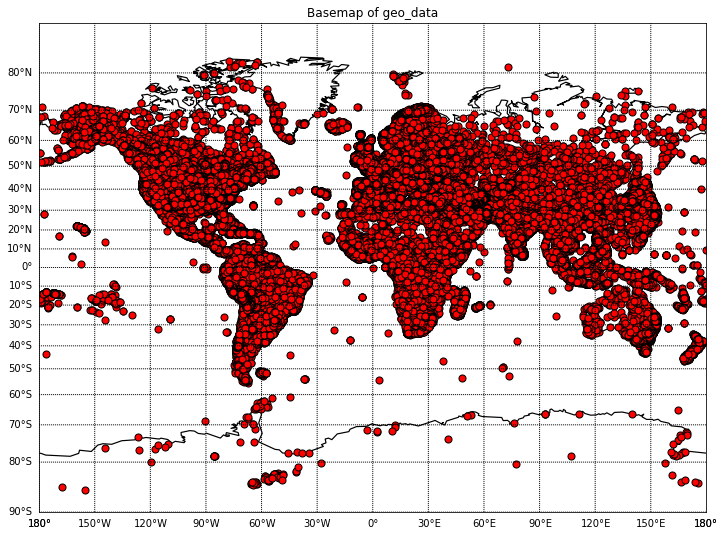

In [0]:
fig = plt.figure(figsize = (12, 9))

m = Basemap(projection = 'mill', 
            llcrnrlat = -90,
            urcrnrlat = 90,
            llcrnrlon = -180,
            urcrnrlon = 180,
            resolution = 'c'
            )

m.drawcoastlines(color="black",linewidth=1.2)

m.drawparallels(np.arange(-90,90,10), labels = [True, False, False, False])

m.drawmeridians(np.arange(-180,180,30), labels = [0,0,0,1])

lat_y = df[0].tolist()
lon_x = df[1].tolist()

colors = 'red'

m.scatter(lon_x, lat_y, latlon = True, s = 50, c = colors, marker = 'o', alpha = 1, edgecolor = 'k', linewidth = 1, zorder = 2)

plt.title('Basemap of geo_data')

plt.show